In [120]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

from scipy import stats # needed for ks test

from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp
# specify blue/orange colors for qualitative intervals/data
blue_qual = [blue_cmp.colors[50], blue_cmp.colors[100], blue_cmp.colors[150], blue_cmp.colors[200], blue_cmp.colors[250]]
orange_qual = [orange_cmp.colors[36], orange_cmp.colors[72], orange_cmp.colors[108], orange_cmp.colors[144], orange_cmp.colors[180], orange_cmp.colors[216], orange_cmp.colors[252]]


In [90]:
# load data
# set-up paths
home_dir = '/Volumes/Data/'
# home_dir = "/mnt/labNAS/"


in_path = home_dir+'Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = home_dir+'Emily/figures/fig_2_mapseq/python_out/'


# Load normalized count data - minimum intervention
with open(in_path + 'M194_M220_OMC_separate_all_count.pkl', 'rb') as f:
    omc_count = pickle.load(f)
    
with open(in_path + 'M194_M220_ACA_separate_all_count.pkl', 'rb') as f:
    aca_count = pickle.load(f)

with open(in_path + 'M194_M220_OMC_separate_all_countN.pkl', 'rb') as f:
    omc_countN = pickle.load(f)
    
with open(in_path + 'M194_M220_ACA_separate_all_countN.pkl', 'rb') as f:
    aca_countN = pickle.load(f)

In [106]:
plot_areas = ['AOMCi', 'POMCi','AOMCc', 'POMCc', 'AUD', 'STRd',
       'STRv', 'TH', 'HY', 'AMY', 'HIP', 'SNr', 'SCm', 'PG', 'APAGd', 'APAGv',
       'PPAGd', 'PPAGv', 'RN']
omc_countN_cdf = dfs_to_cdf(omc_countN, plot_areas=plot_areas)
omc_countN_cdf

,x,cdf,mice,species,dataset,area
0,0.000016,0.000000,MMM1,MMus,M194,AOMCi
1,0.000016,0.000000,MMM1,MMus,M194,AOMCi
2,0.000016,0.000000,MMM1,MMus,M194,AOMCi
3,0.000016,0.000000,MMM1,MMus,M194,AOMCi
4,0.000016,0.000000,MMM1,MMus,M194,AOMCi
...,...,...,...,...,...,...
995,3.607977,0.979592,STM7,STeg,M220,RN
996,3.644610,0.979592,STM7,STeg,M220,RN
997,3.681615,0.979592,STM7,STeg,M220,RN
998,3.718996,0.979592,STM7,STeg,M220,RN


# plot cdfs by species

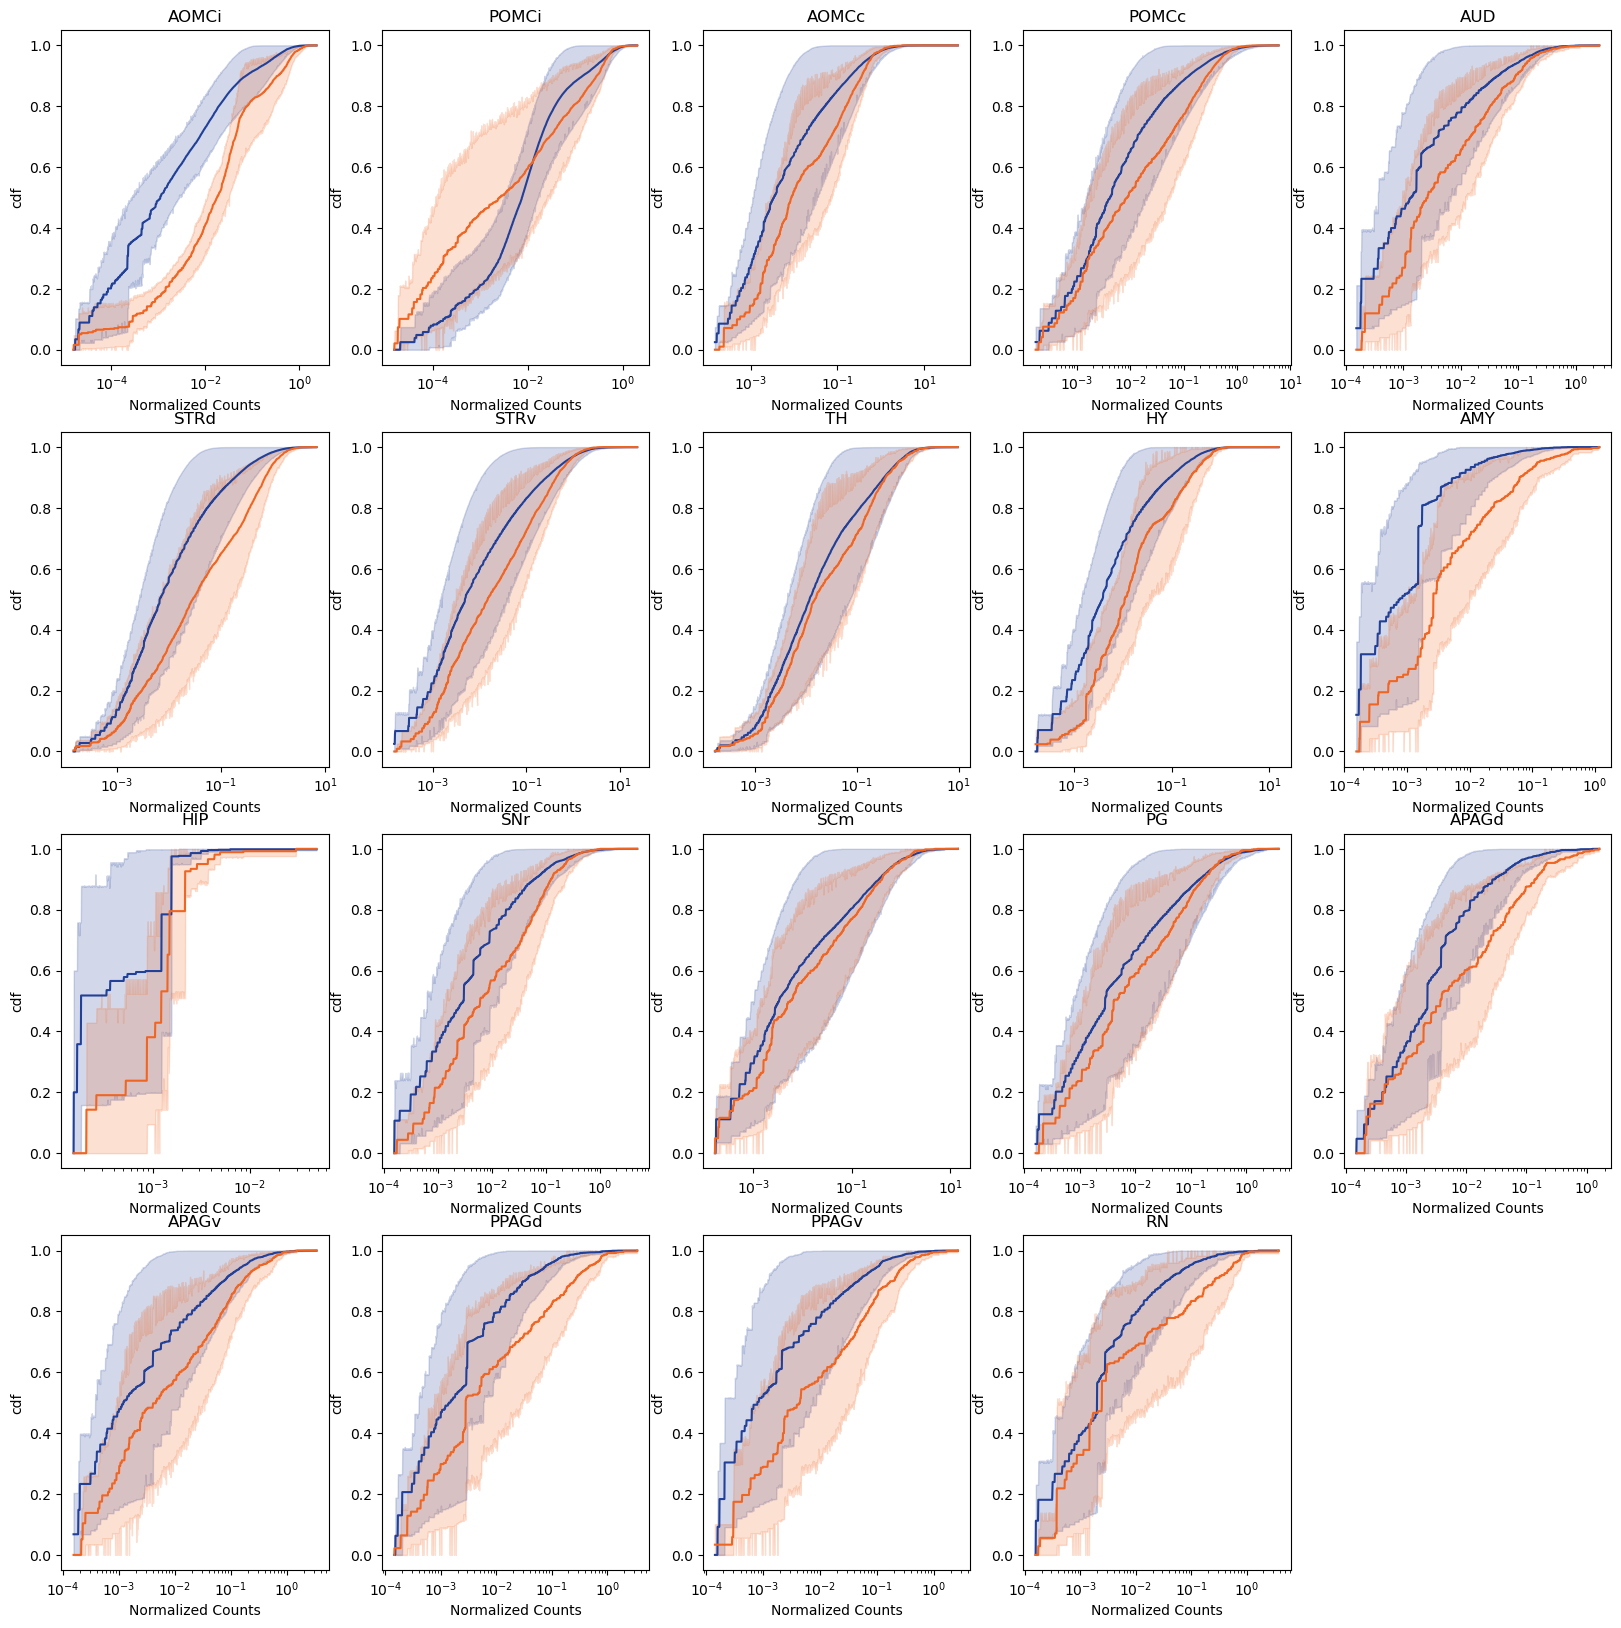

In [33]:
fig, axs = plt.subplots(4,5, figsize=(20,20))

i=0
for ax in axs.flat:
    if i <19:
        area = plot_areas[i]

        plot = omc_countN_cdf[omc_countN_cdf['area']==area]
        
        plot_mm = plot[plot["species"] =="MMus"]
        plot_st = plot[plot["species"] =="STeg"]

        sns.lineplot(plot_mm, x="x", y="cdf", color=blue_cmp.colors[255], ax=ax) # plots mean and ci95 of mice
        sns.lineplot(plot_st, x="x", y="cdf", color=orange_cmp.colors[255], ax=ax) # plots mean and ci95 of mice
        ax.set_xscale("log")
        ax.set_xlabel("Normalized Counts")

        ax.set_title(area)
        i+=1
    else:
        ax.axis('off')

plt.show()

In [49]:
all_bc = pd.DataFrame(columns=list(omc_countN[0].columns)+["mice", "species", "dataset"])
for i in range(metadata.shape[0]):
    df = omc_countN[i].copy(deep=True)
    df['mice'] = metadata.loc[i, 'mice']
    df['species'] = metadata.loc[i, "species"]
    df['dataset'] = metadata.loc[i, "dataset"]
    all_bc = pd.concat([all_bc, df])

all_bc = all_bc.reset_index(drop=True)
all_bc

,OB,AOMCi,POMCi,ACAi,AOMCc,POMCc,ACAc,AUD,STRd,STRv,...,APAGv,PPAGd,PPAGv,RN,L1_ctl,H2O_inj_ctl,H2O_targ_ctl,mice,species,dataset
0,0.0,0.000000,0.000000,0.020206,0.000000,0.000000,0.000188,0.0,0.005718,0.002611,...,0.000000,0.000167,0.000000,0.0,0.0,0.0,0.0,MMM1,MMus,M194
1,0.0,0.000000,0.000000,0.016393,0.000000,0.000000,0.001502,0.0,0.021283,0.001382,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,MMM1,MMus,M194
2,0.0,0.000000,0.001950,0.000000,0.000000,0.000000,0.000000,0.0,0.000159,0.001075,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,MMM1,MMus,M194
3,0.0,0.000138,0.003990,0.000000,0.002357,0.006801,0.000000,0.0,0.011118,0.020885,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,MMM1,MMus,M194
4,0.0,0.000020,0.005668,0.000000,0.000181,0.000591,0.000000,0.0,0.000318,0.003071,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,MMM1,MMus,M194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76813,0.0,0.000000,0.000000,0.304256,0.000000,0.000000,0.139098,0.0,0.257658,0.074074,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,STM7,STeg,M220
76814,0.0,0.000000,0.000000,0.023121,0.000000,0.000000,0.105263,0.0,0.405405,0.148148,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,STM7,STeg,M220
76815,0.0,0.000000,0.000000,0.253547,0.000000,0.000000,0.000000,0.0,0.481081,0.185185,...,0.118156,0.168116,0.010753,0.0,0.0,0.0,0.0,STM7,STeg,M220
76816,0.0,0.000000,0.000000,0.319233,0.000000,0.031546,0.007519,0.0,0.558559,0.126362,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,STM7,STeg,M220


In [82]:
# ks test against distributions b/w species
to_test = ['OB', 'AOMCi', 'POMCi', 'ACAi', 'AOMCc', 'POMCc', 'ACAc', 'AUD', 'STRd',
       'STRv', 'TH', 'HY', 'AMY', 'HIP', 'SNr', 'SCm', 'PG', 'APAGd', 'APAGv',
       'PPAGd', 'PPAGv', 'RN', 'L1_ctl', 'H2O_inj_ctl', 'H2O_targ_ctl']

ks_result = pd.DataFrame(columns=["area", "ks_stat", "pvalue", "p<0.05?"])

for i in range(len(to_test)):
       area = to_test[i]
       area_df = all_bc.loc[:, [area, "mice", "species", "dataset"]]
       area_idx = area_df[area] > 0
       area_n0 = area_df[area_idx]

       area_mm = area_n0[area_n0['species']=="MMus"]
       area_st = area_n0[area_n0['species']=="STeg"]

       if area_mm.shape[0]==0 or area_st.shape[0]==0:
              row = [area, np.nan, np.nan, np.nan]
       else:
              result = stats.ks_2samp(area_mm.iloc[:,0], area_st.iloc[:,0])
              row = [area, result[0], result[1], result[1]<0.05]

       ks_result.loc[i,:] = row

ks_result

,area,ks_stat,pvalue,p<0.05?
0,OB,0.661972,0.0,True
1,AOMCi,0.36211,0.0,True
2,POMCi,0.207016,0.0,True
3,ACAi,0.281773,0.0,True
4,AOMCc,0.22451,0.0,True
5,POMCc,0.18091,0.0,True
6,ACAc,0.388635,0.0,True
7,AUD,0.279332,0.0,True
8,STRd,0.295477,0.0,True
9,STRv,0.206373,0.0,True


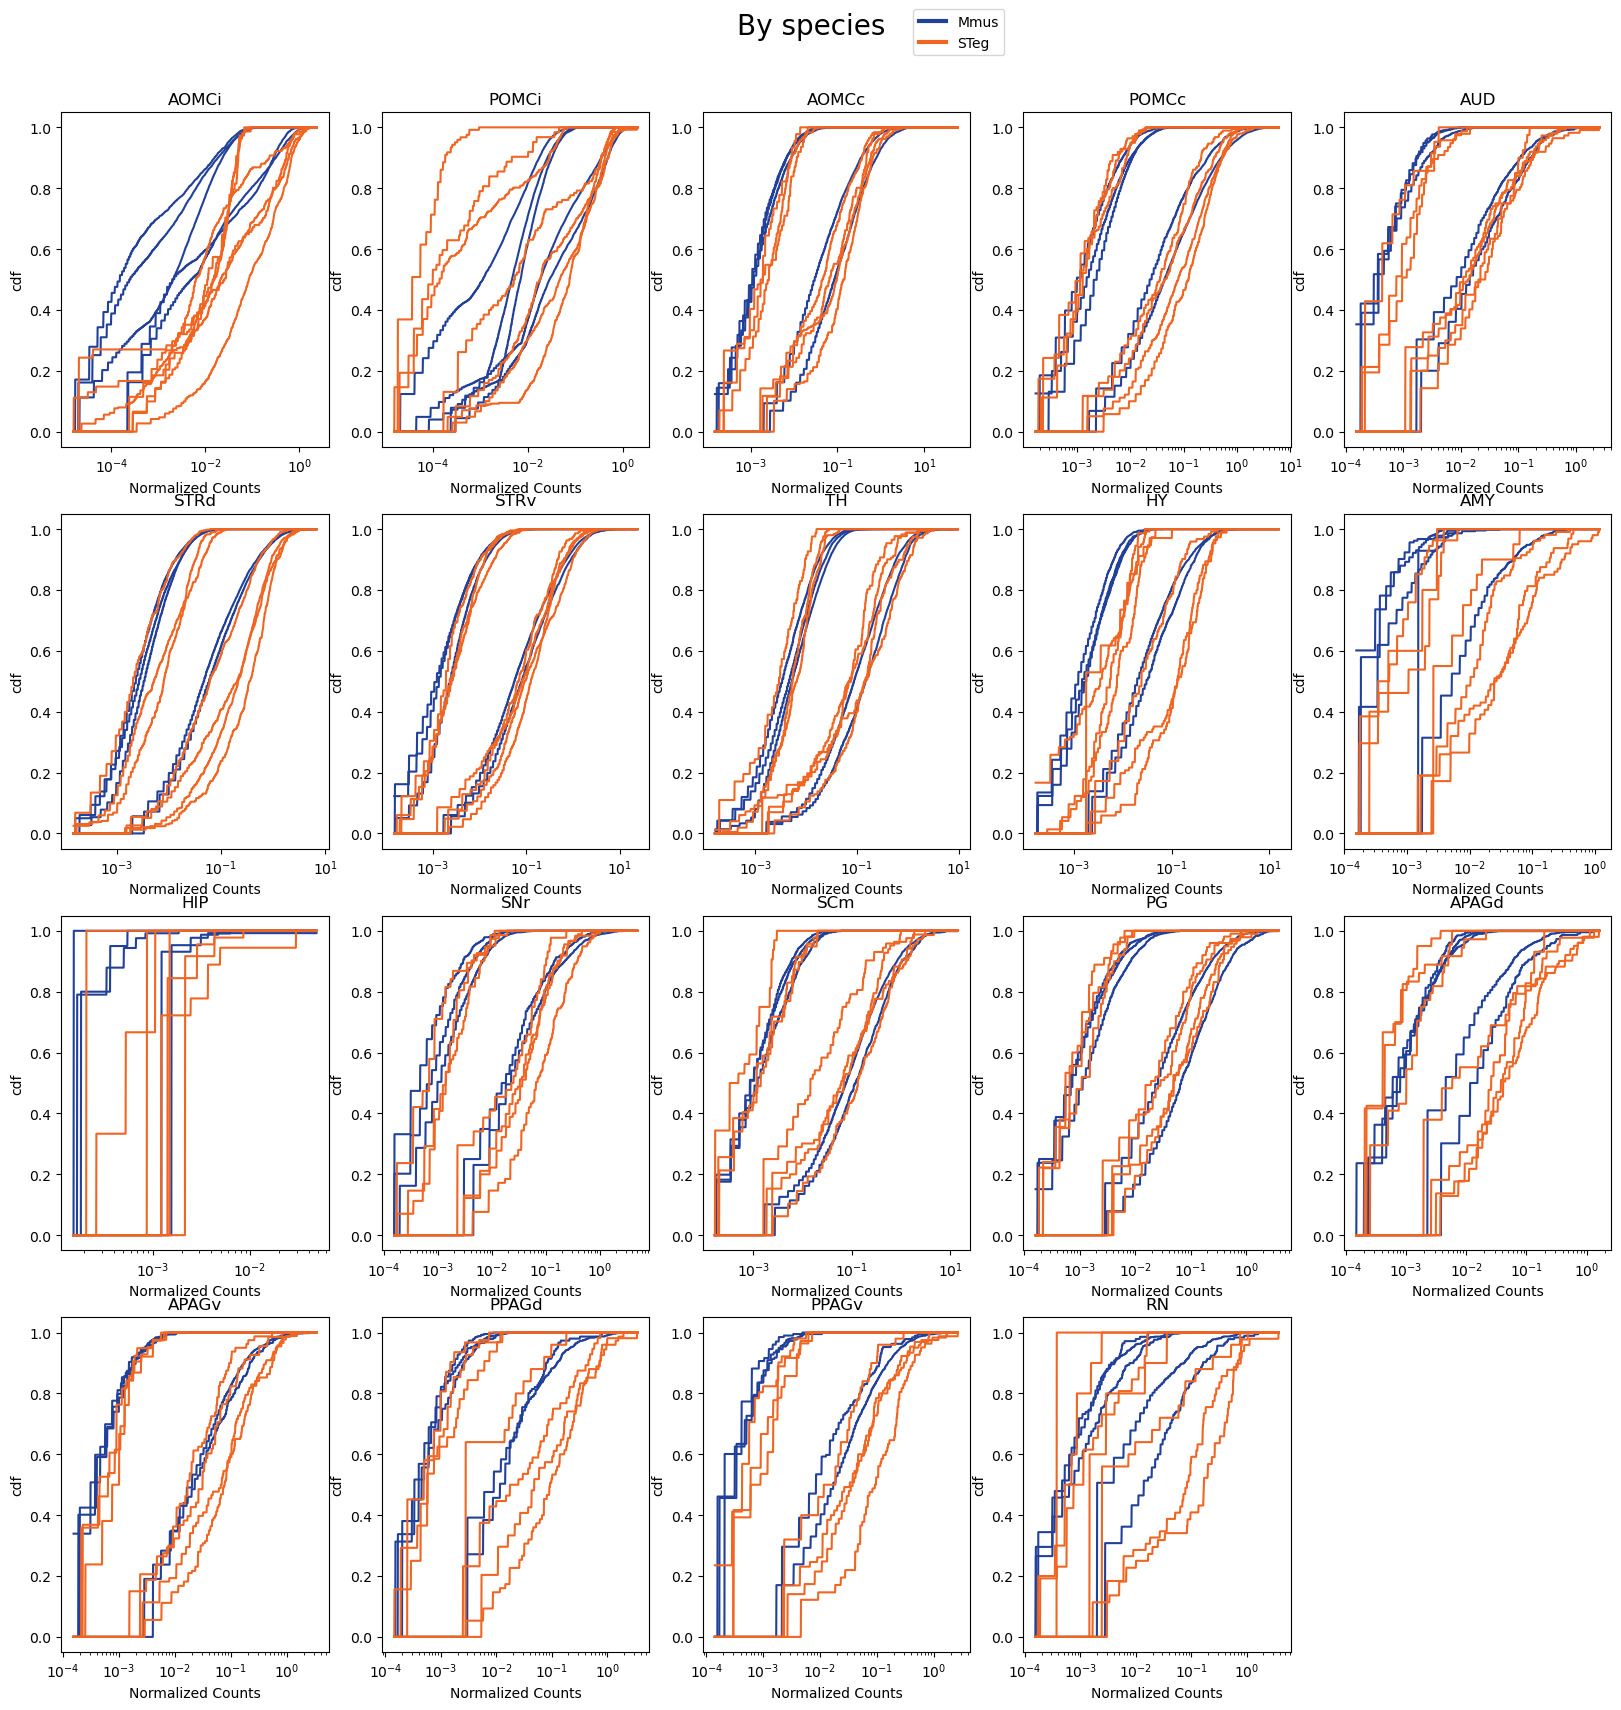

In [117]:
fig, axs = plt.subplots(4,5, figsize=(20,20))

i=0
for ax in axs.flat:
    if i <19:
        area = plot_areas[i]

        plot = omc_countN_cdf[omc_countN_cdf['area']==area]
        
        plot_mm = plot[plot["species"] =="MMus"]
        plot_st = plot[plot["species"] =="STeg"]

        sns.lineplot(plot_mm, x="x", y="cdf", estimator=None, units="mice", color=blue_cmp.colors[255], ax=ax) # plots individual mice
        sns.lineplot(plot_st, x="x", y="cdf", estimator=None, units="mice", color=orange_cmp.colors[255], ax=ax) # plots individual mice
        ax.set_xscale("log")
        ax.set_xlabel("Normalized Counts")

        ax.set_title(area)
        i+=1
    else:
        ax.axis('off')

# create cutom legend
colors = [blue_cmp.colors[255], orange_cmp.colors[255]]
lines = [Line2D([0], [0], color=c, linewidth=3) for c in colors]
labels = ['Mmus', "STeg"]
fig.legend(lines,labels, bbox_to_anchor=(0.6, 0.935))

plt.suptitle("By species", y=0.93, size=20)
plt.show()

# plot cdfs by dataset

Text(0.5, 0.93, 'By Dataset')

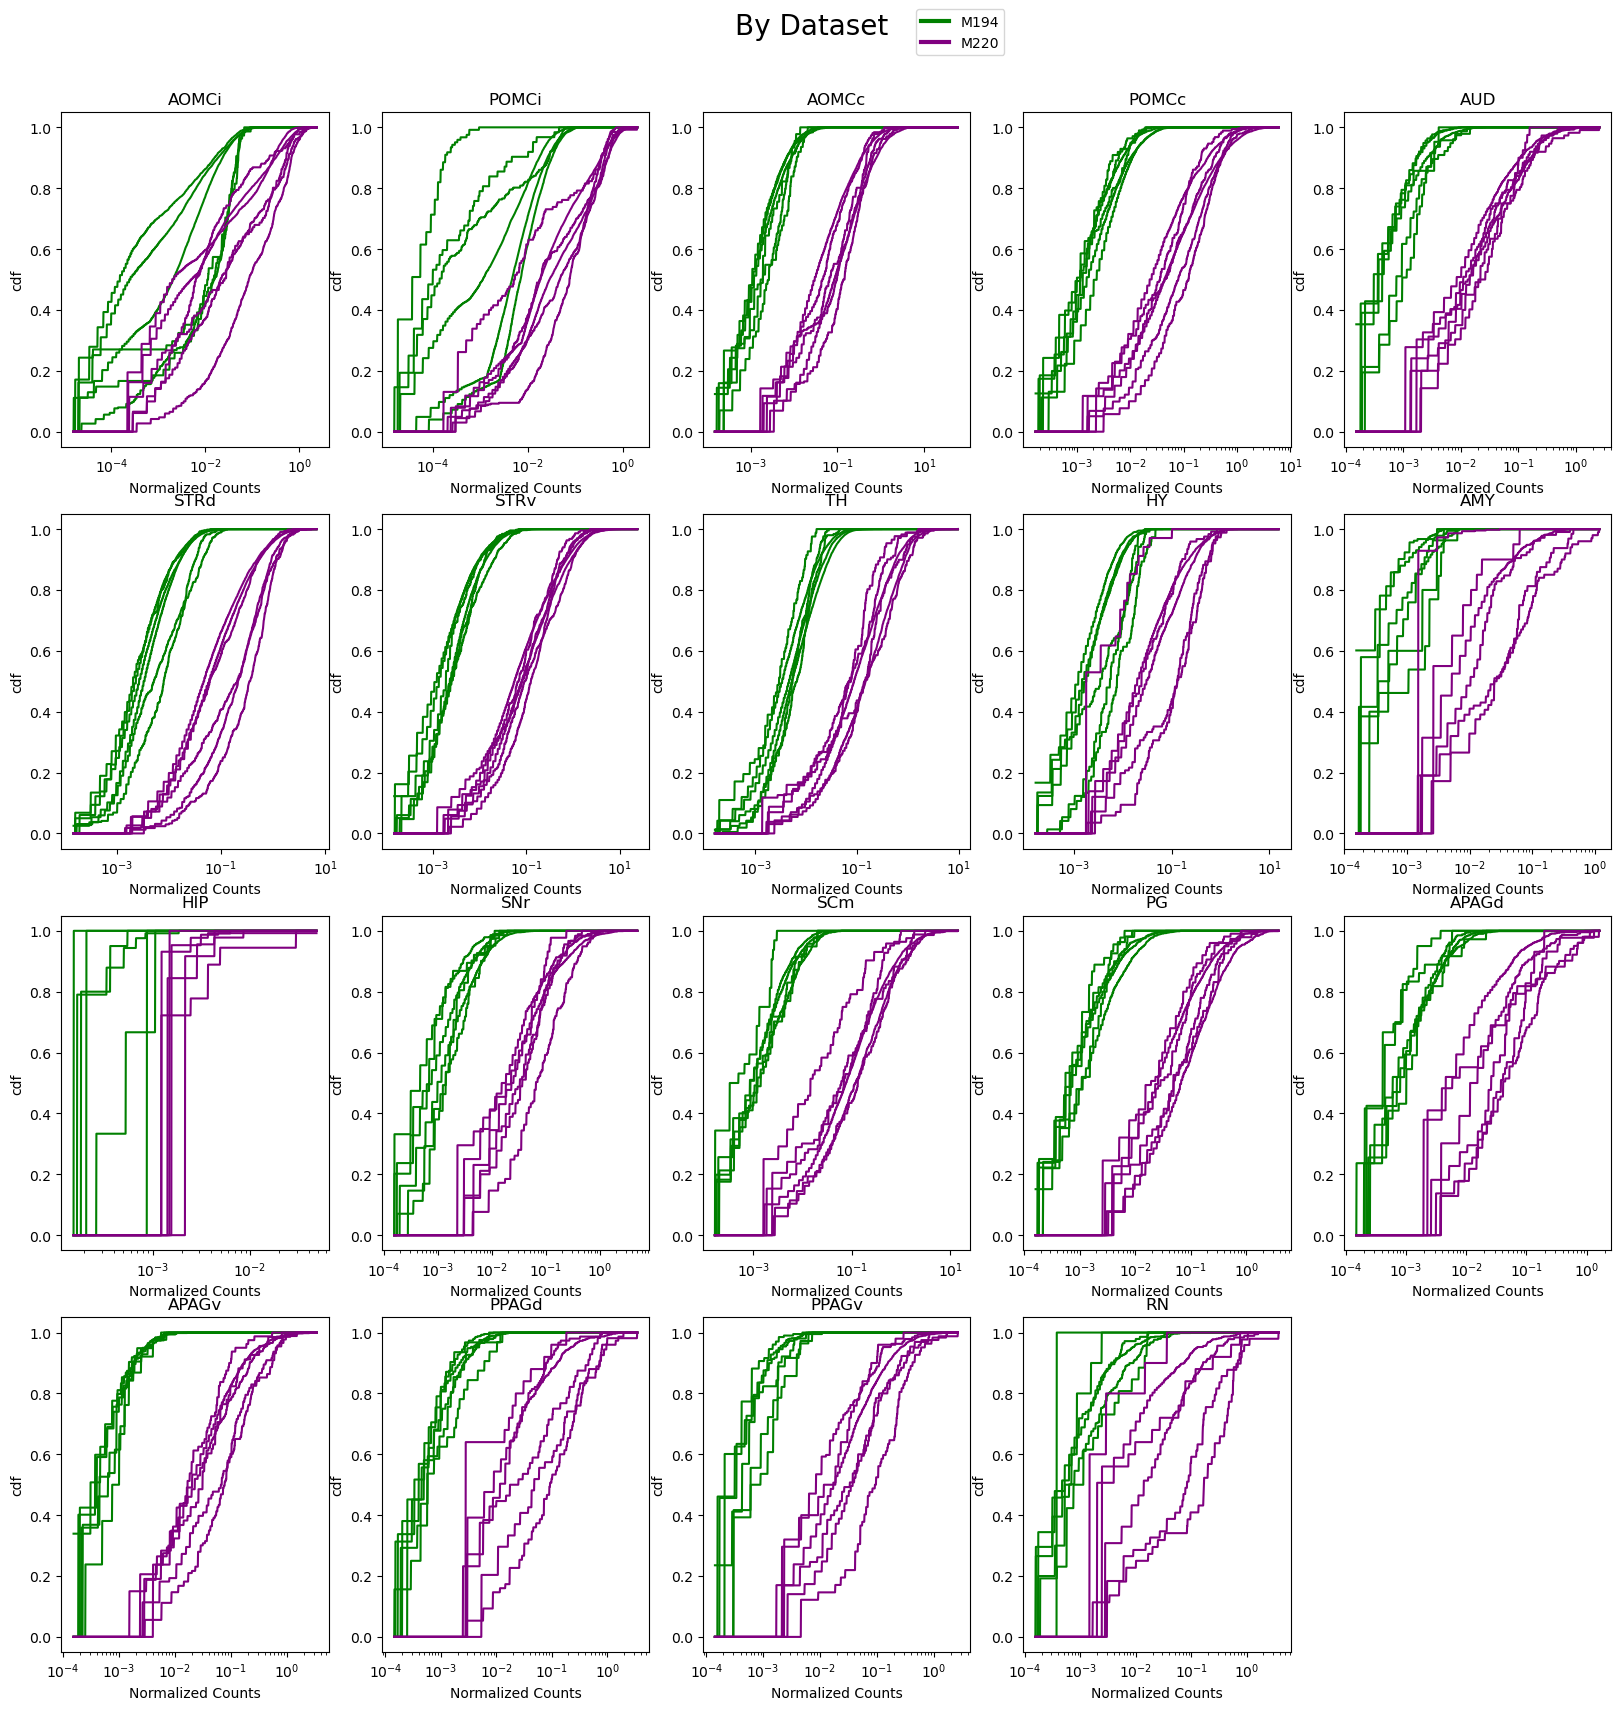

In [119]:
fig, axs = plt.subplots(4,5, figsize=(20,20))

i=0
for ax in axs.flat:
    if i <19:
        area = plot_areas[i]

        plot = omc_countN_cdf[omc_countN_cdf['area']==area]
        
        plot_194 = plot[plot["dataset"] =="M194"]
        plot_220 = plot[plot["dataset"] =="M220"]

        sns.lineplot(plot_194, x="x", y="cdf", estimator=None, units="mice", color="green", ax=ax) # plots individual mice
        sns.lineplot(plot_220, x="x", y="cdf", estimator=None, units="mice", color="purple", ax=ax) # plots individual mice
        ax.set_xscale("log")
        ax.set_xlabel("Normalized Counts")

        ax.set_title(area)
        i+=1
    else:
        ax.axis('off')

# create cutom legend
colors = ["green", "purple"]
lines = [Line2D([0], [0], color=c, linewidth=3) for c in colors]
labels = ['M194', "M220"]
fig.legend(lines,labels, bbox_to_anchor=(0.6, 0.935))

plt.suptitle("By Dataset", y=0.93, size=20)
plt.show()

## Apply Batch correction

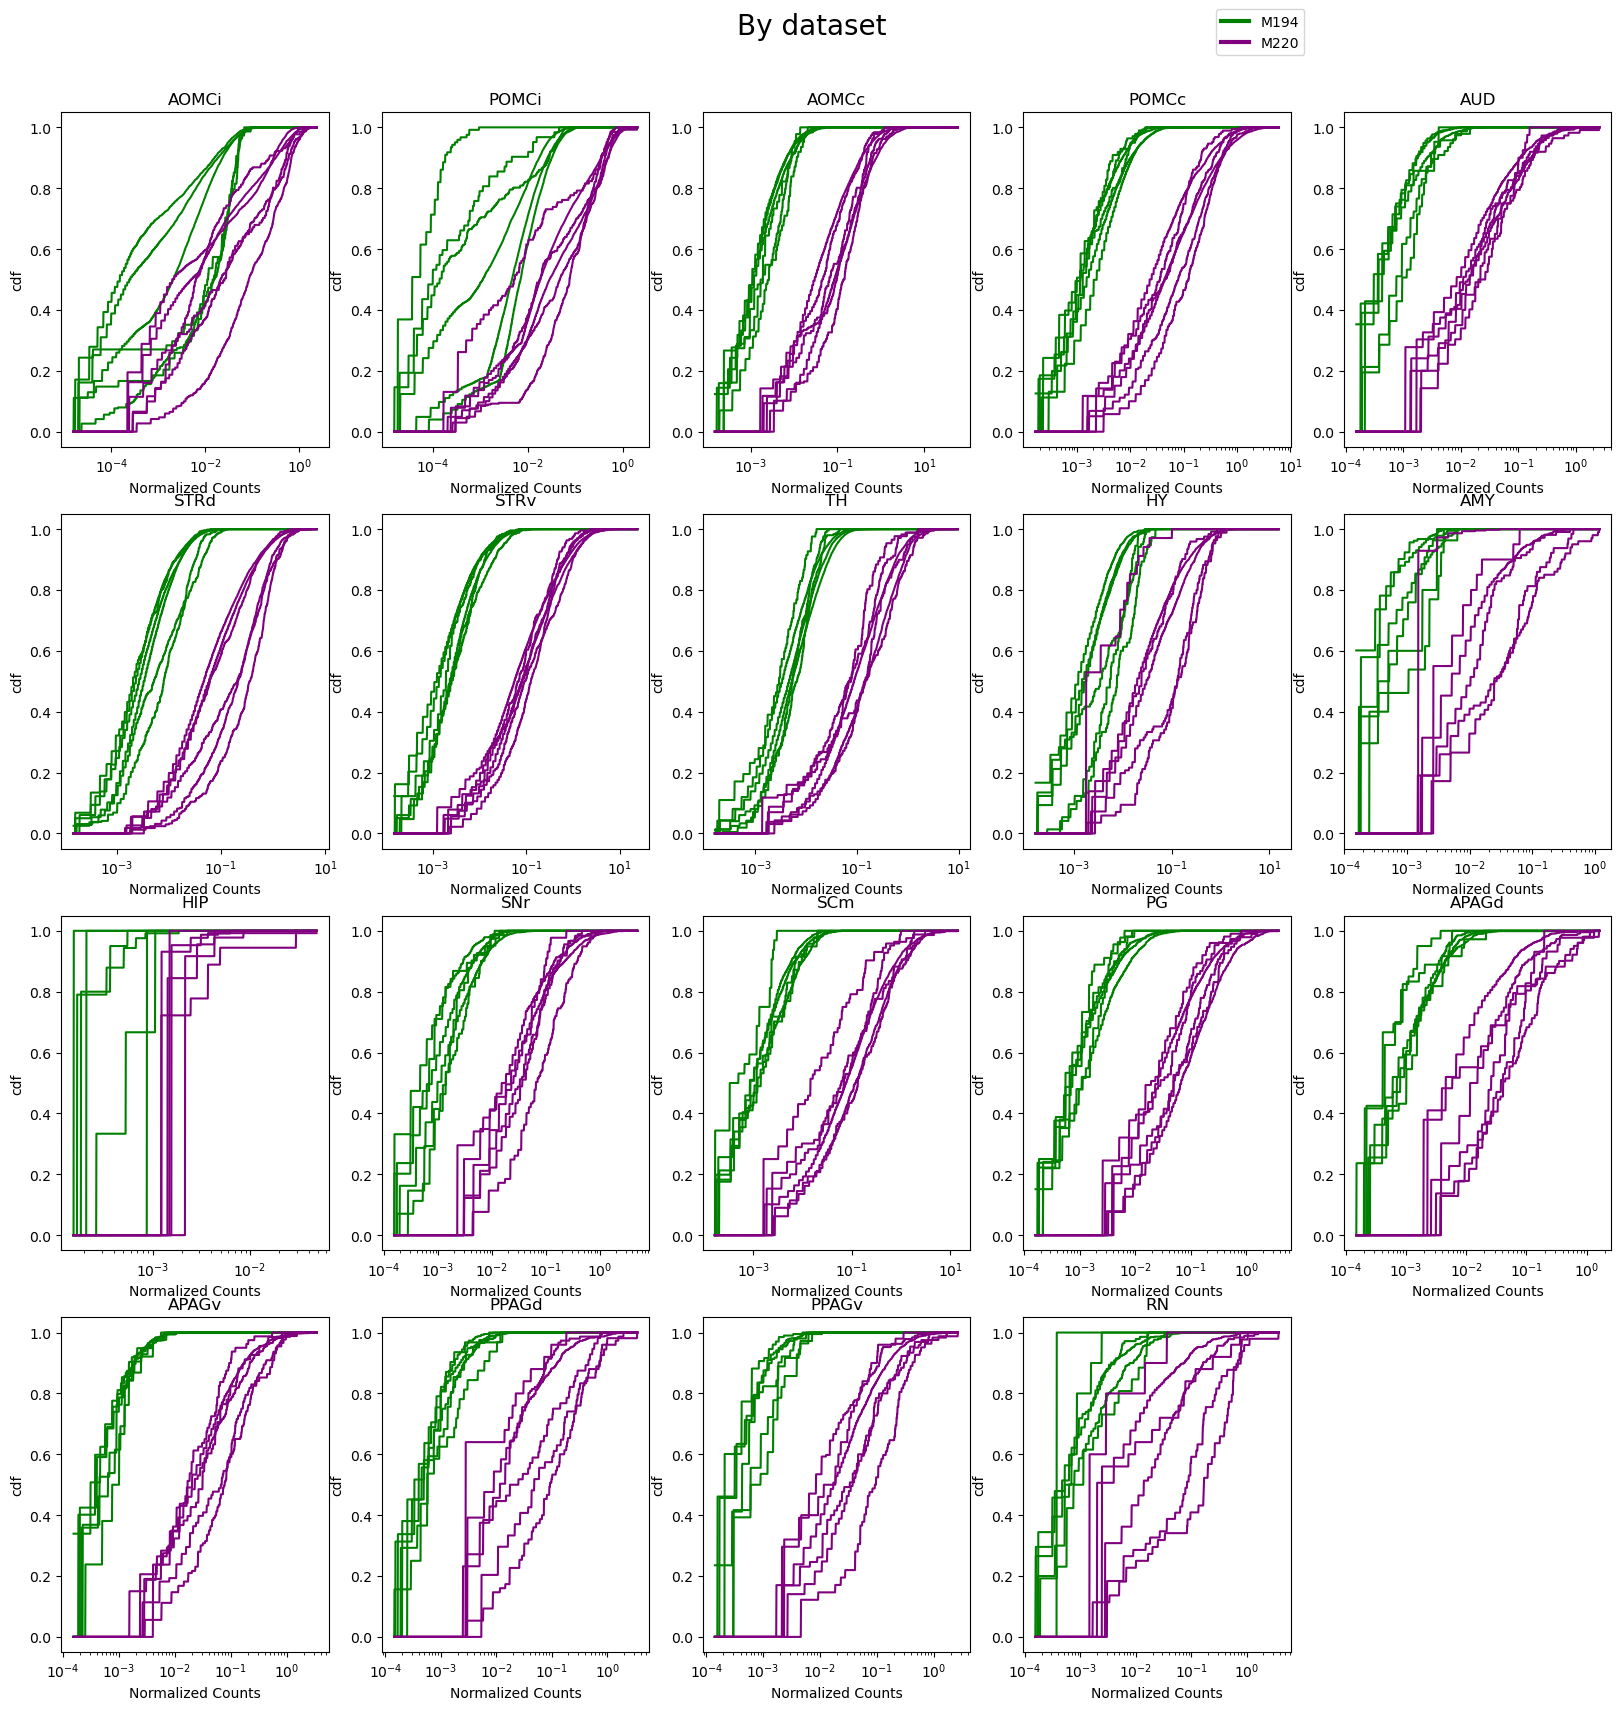

In [126]:
# Normalize by median source median BC/neuron
to_plot = ['AOMCi', 'POMCi','AOMCc', 'POMCc', 'AUD', 'STRd',
       'STRv', 'TH', 'HY', 'AMY', 'HIP', 'SNr', 'SCm', 'PG', 'APAGd', 'APAGv',
       'PPAGd', 'PPAGv', 'RN']
fig1 = plot_cdf(omc_countN, plot_areas=to_plot, color_by="dataset", colors=["green", "purple"])
plt.show()

In [142]:
# normalize by median BC/neuron per brain (at source/injection region)

print("raw counts:")
display(omc_count[0].head())
print("\n")
print("counts normalized to spike-ins:")
display(omc_countN[0].head())


raw counts:


,OB,AOMCi,POMCi,ACAi,AOMCc,POMCc,ACAc,AUD,STRd,STRv,...,AMY,HIP,SNr,SCm,PG,APAGd,APAGv,PPAGd,PPAGv,RN
0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,7.0,88.0,0.0,13.0,23.0,0.0,0.0,70.0,136.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,125.0,0.0,1.0,2.0,0.0,0.0,2.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,56.0,0.0,10.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,268.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




counts normalized to spike-ins:


,OB,AOMCi,POMCi,ACAi,AOMCc,POMCc,ACAc,AUD,STRd,STRv,...,SCm,PG,APAGd,APAGv,PPAGd,PPAGv,RN,L1_ctl,H2O_inj_ctl,H2O_targ_ctl
0,0.0,0.000000,0.000000,0.020206,0.000000,0.000000,0.000188,0.0,0.005718,0.002611,...,0.001755,0.0,0.0,0.0,0.000167,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.016393,0.000000,0.000000,0.001502,0.0,0.021283,0.001382,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.001950,0.000000,0.000000,0.000000,0.000000,0.0,0.000159,0.001075,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000138,0.003990,0.000000,0.002357,0.006801,0.000000,0.0,0.011118,0.020885,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000020,0.005668,0.000000,0.000181,0.000591,0.000000,0.0,0.000318,0.003071,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
# normalize by median BC/neuron per brain? (across all target regions)

omc_countN

In [ ]:


fig2 = plot_cdf(omc_countN, plot_areas=to_plot, color_by="dataset", colors=["green", "purple"])
plt.show()


# compare 

In [105]:
math.ceil(17/4)

5

In [136]:
import matplotlib.pyplot as plt
####### 1. load packages
import pandas as pd
import numpy as np
import scipy.io as sio
import pickle
import mat73
from sklearn.preprocessing import binarize

# keep track of common variables

mat_path = '/Volumes/Data/Emily/MAPseq/2301_MAPseq/230308_M220_data/M220_mat_73.mat'
ncol_path = '/Volumes/Data/Emily/MAPseq/2301_MAPseq/230308_M220_data/M220_col_names.csv'
order = ["OB","AOMCi","AOMCc","POMCi","POMCc","ACAi","ACAc","STRd","STRv","AUD","TH","HY","AMY","HIP","SNr","PG","SCm","APAGd","APAGv","PPAGd","PPAGv","RNi","RNc", 'L1_ctl', 'H2O_ctl_targ','H2O_ctl_inj']


sample = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6']
mice = ['MMM4', 'MMF5', 'STF4', 'STM5', 'STF6', 'STM7']
num_samples = 6


out_path = '/Volumes/Data/Emily/MAPseq/2301_MAPseq/python_analysis_M220/data_objects/'
# load in data and column information
data = mat73.loadmat(mat_path)
cols = pd.read_csv(ncol_path, header=None, names=['brain_areas', 'sample','mseq_brain', 'area_type'])
brain_areas = cols.brain_areas.to_list()

In [148]:
spikes = data['spikes']
for i in range(len(spikes['counts2u'])):
    print(spikes['counts2u'][i].shape)

(389,)
(360,)
(436,)
(384,)
(500,)
(413,)
(488,)
(586,)
(429,)
(578,)
(812,)
(331,)
(326,)
(364,)
(260,)
(353,)
(345,)
(469,)
(360,)
(637,)
(831,)
(502,)
(594,)
(532,)
(301,)
(594,)
(590,)
(603,)
(508,)
(662,)
(639,)
(222,)
(349,)
(591,)
(439,)
(246,)
(332,)
(584,)
(501,)
(465,)
(639,)
(424,)
(634,)
(490,)
(649,)
(563,)
(731,)
(544,)
(570,)
(679,)
(672,)
(333,)
(305,)
(619,)
(510,)
(653,)
(357,)
(428,)
(599,)
(689,)
(704,)
(536,)
(776,)
(779,)
(690,)
(473,)
(749,)
(568,)
(559,)
(383,)
(814,)
(437,)
(260,)
(410,)
(384,)
(418,)
(400,)
(449,)
(687,)
(597,)
(418,)
(606,)
(634,)
(712,)
(533,)
(812,)
(917,)
(729,)
(451,)
(406,)
(701,)
(330,)
(386,)
(538,)
(317,)
(378,)
(186,)
(216,)
(409,)
(312,)
(274,)
(294,)
(317,)
(266,)
(555,)
(459,)
(502,)
(419,)
(372,)
(606,)
(464,)
(229,)
(245,)
(392,)
(269,)
(347,)
(345,)
(372,)
(333,)
(343,)
(143,)
(739,)
(4591,)
(3327,)
(3342,)
(4384,)
(4126,)
(4165,)
(2917,)
(3835,)
(5402,)
(4202,)
(5887,)
(3270,)
(3532,)
(3283,)
(3209,)
(3526,)
(4825,)
(3806,)
(1

In [150]:
cols

,brain_areas,sample,mseq_brain,area_type
0,OB,MMM4,B1,target
1,AOMCc,MMM4,B1,target
2,POMCc,MMM4,B1,target
3,ACAc,MMM4,B1,target
4,STRd,MMM4,B1,target
...,...,...,...,...
136,ACAi,STF6,B5,injection
137,AOMCi,STM7,B6,injection
138,POMCi,STM7,B6,injection
139,ACAi,STM7,B6,injection
